In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.naive_bayes import GaussianNB, CategoricalNB

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.00,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.00,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.00,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.00,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.00,2,125510.82,1,NaN,1.0,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.00,8,113755.78,2,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822,NaN,Male,50.00,7,0.00,2,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29.00,4,115046.74,4,1.0,0.0,119346.88,1
8,9,15792365,He,501,France,Male,44.00,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


In [6]:
missing_values = df.isnull().sum()
missing_values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
rows_with_nulls = df[df.isnull().any(axis=1)]
rows_with_nulls

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


In [9]:
# Dropping rows with null values (i.e. index number 4, 6, 8, 9)
df_null_dropped = df.drop([4,6,8,9])
df_null_dropped.reset_index(drop=True, inplace=True)
df_null_dropped.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
5,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
6,11,15767821,Bearce,528,France,Male,31.0,6,102016.72,2,0.0,0.0,80181.12,0
7,12,15737173,Andrews,497,Spain,Male,24.0,3,0.00,2,1.0,0.0,76390.01,0
8,13,15632264,Kay,476,France,Female,34.0,10,0.00,2,1.0,0.0,26260.98,0
9,14,15691483,Chin,549,France,Female,25.0,5,0.00,2,0.0,0.0,190857.79,0


In [10]:
df_null_dropped['Exited'].value_counts()

Exited
0    7960
1    2038
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

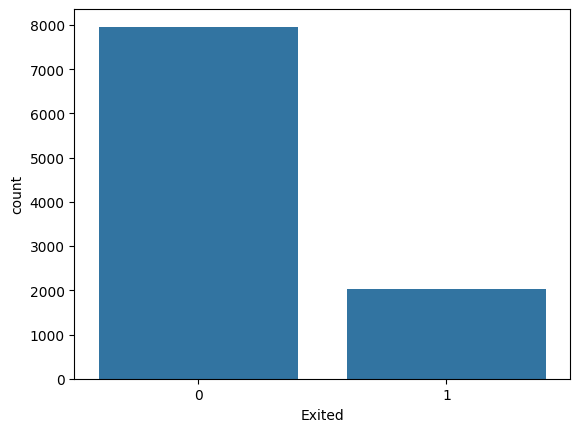

In [11]:
sns.countplot(df_null_dropped, x='Exited')

In [13]:
df_dropped = df_null_dropped.drop(columns=['RowNumber','CustomerId','Surname','Geography'])
df_dropped.head(20)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42.00,2,0.00,1,1.0,1.0,101348.88,1
1,608,Female,41.00,1,83807.86,1,0.0,1.0,112542.58,0
2,502,Female,42.00,8,159660.80,3,1.0,0.0,113931.57,1
3,699,Female,39.00,1,0.00,2,0.0,0.0,93826.63,0
4,645,Male,44.00,8,113755.78,2,1.0,0.0,149756.71,1
5,376,Female,29.00,4,115046.74,4,1.0,0.0,119346.88,1
6,528,Male,31.00,6,102016.72,2,0.0,0.0,80181.12,0
7,497,Male,24.00,3,0.00,2,1.0,0.0,76390.01,0
8,476,Female,34.00,10,0.00,2,1.0,0.0,26260.98,0
9,549,Female,25.00,5,0.00,2,0.0,0.0,190857.79,0


In [14]:
exited_rate = df_dropped['Exited'].value_counts()/df_dropped['Exited'].count()
exited_rate

Exited
0    0.796159
1    0.203841
Name: count, dtype: float64

In [15]:
df_dropped.groupby(['Gender'])['Exited'].mean()

Gender
Female    0.250715
Male      0.164803
Name: Exited, dtype: float64

In [19]:
exited_gender_card = df_dropped.pivot_table(index=['Gender'], columns=['HasCrCard'], values=['Exited'], aggfunc='mean')
exited_gender_card

Exited          
HasCrCard       0.0       1.0
Gender                       
Female     0.254626  0.249060
Male       0.168864  0.163128

<Axes: ylabel='Gender'>

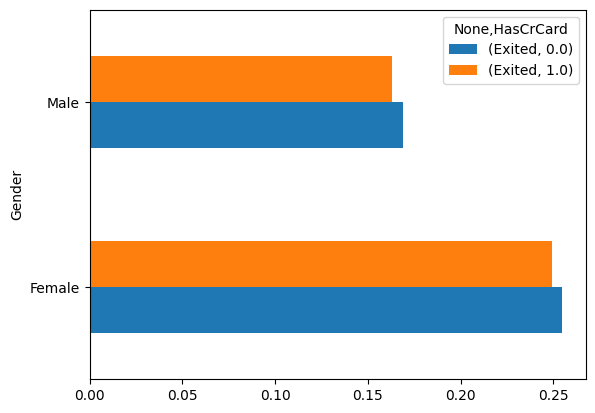

In [20]:
exited_gender_card.plot.barh()

In [21]:
exited_gender_active = df_dropped.pivot_table(index=['Gender'], columns=['IsActiveMember'], values=['Exited'], aggfunc='mean')
exited_gender_active

Exited          
IsActiveMember       0.0       1.0
Gender                            
Female          0.320796  0.181340
Male            0.223080  0.112081

<Axes: ylabel='Gender'>

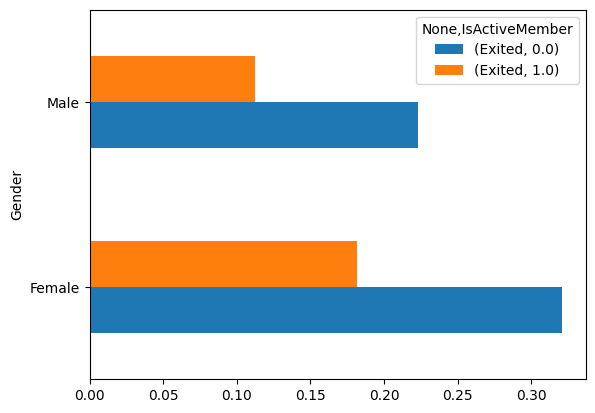

In [22]:
exited_gender_active.plot.barh()

In [23]:
exited_gender_active_card = df_dropped.pivot_table(index=['Gender'], columns=['IsActiveMember','HasCrCard'], values=['Exited'], aggfunc='mean')
exited_gender_active_card

Exited                              
IsActiveMember       0.0                 1.0          
HasCrCard            0.0       1.0       0.0       1.0
Gender                                                
Female          0.308869  0.325654  0.203730  0.171501
Male            0.211513  0.227766  0.131206  0.104063

<Axes: ylabel='Gender'>

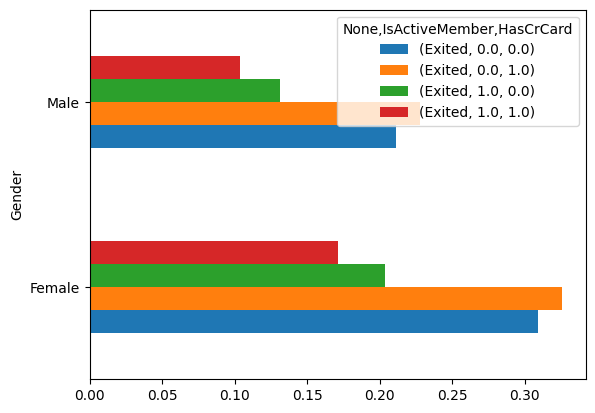

In [24]:
exited_gender_active_card.plot.barh()